#Problem Statement
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

#Column Information
People
ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if the customer complained in the last 2 years, 0 otherwise

#Products
MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years

#Promotion
NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

#Place
NumWebPurchases: Number of purchases made through the company’s website

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s website in the last month

##Target
Need to perform clustering to summarize customer segments.

In [1]:
# Importing the required Libraries in
import pandas as pd
import numpy as np

In [2]:
# Reading the Dataset
data=pd.read_excel("/content/Customer Personality Analysis.xlsx")

In [3]:
# Fecthing the first five row
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
# Viewing the column of the dataset
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
# Checking the shape of the dataset
data.shape

(2240, 29)

In [6]:
# Checking the datatype of the entire dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [7]:
# Checking the entire statiscal value of the not objective column
data.describe().T

,count,mean,min,25%,50%,75%,max,std
ID,2240.0,5592.159821,0.0,2828.25,5458.5,8427.75,11191.0,3246.662198
Year_Birth,2240.0,1968.805804,1893.0,1959.0,1970.0,1977.0,1996.0,11.984069
Income,2216.0,52247.251354,1730.0,35303.0,51381.5,68522.0,666666.0,25173.076661
Kidhome,2240.0,0.444196,0.0,0.0,0.0,1.0,2.0,0.538398
Teenhome,2240.0,0.50625,0.0,0.0,0.0,1.0,2.0,0.544538
Dt_Customer,2240,2013-07-10 10:01:42.857142784,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-30 06:00:00,2014-06-29 00:00:00,NaN
Recency,2240.0,49.109375,0.0,24.0,49.0,74.0,99.0,28.962453
MntWines,2240.0,303.935714,0.0,23.75,173.5,504.25,1493.0,336.597393
MntFruits,2240.0,26.302232,0.0,1.0,8.0,33.0,199.0,39.773434
MntMeatProducts,2240.0,166.95,0.0,16.0,67.0,232.0,1725.0,225.715373


In [8]:
# We have enough look up the dataset, now it's turn to clean the data
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Checking the outlier

In [9]:
# Removing the duplicated rows from the dataset
data=data.drop_duplicates()

In [10]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [11]:
from scipy import stats
# Calculate Z-scores
z_scores = stats.zscore(data['Income'])
z_scores.max()
out=data['Income'][abs(stats.zscore(data['Income']))>3]
out=list(out)
out,len(out)

([], 0)

Alternate way of checking the outlier

In [12]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['Income'].quantile(0.25)
Q3 = data['Income'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data['Income'][(data['Income'] < lower_bound) | (data['Income'] > upper_bound)]
print("Outliers using IQR method:")
print(outliers)

Outliers using IQR method:
164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64


<Axes: xlabel='Income'>

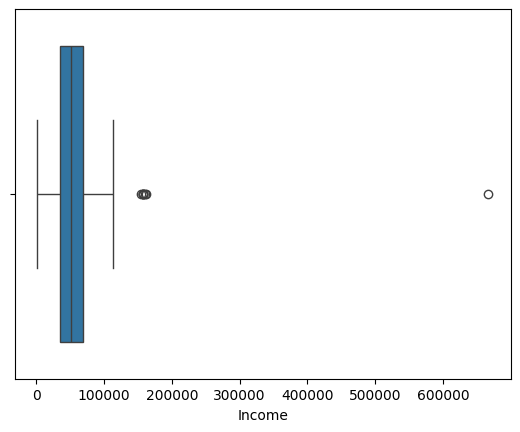

In [13]:
# Visualizing the outlier
import seaborn as sns
sns.boxplot(x=data['Income'])

<ipython-input-14-6a7dc49cba99>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Income'])


<Axes: xlabel='Income', ylabel='Density'>

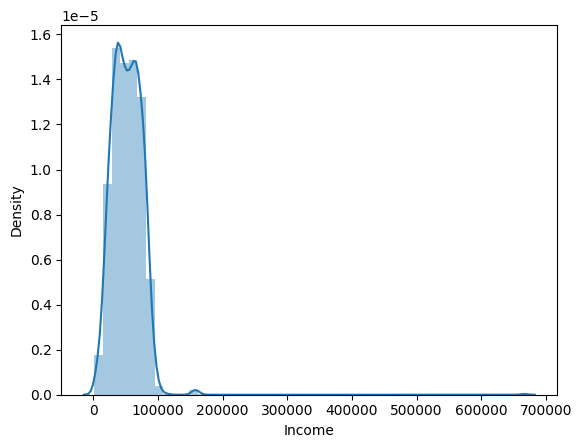

In [14]:
sns.distplot(data['Income'])

In [15]:
# Checking the skewness
data['Income'].skew() # The value which we are getting as of now is +6 mean our plot is right skewed,
                      # outlier will be mostly will be on the maximum side

6.763487372811116

As we have detected there is outlier so, filling with the mean would not be the good option so its better to go with median

In [16]:
data['Income'].fillna(data['Income'].median(),inplace=True)

<ipython-input-16-cb46bdc05ce3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Income'].fillna(data['Income'].median(),inplace=True)


In [17]:
# Checking all the null values once again
data.isnull().sum().sum()

0

In [18]:
#once again viewingup the data
pd.set_option('display.max_columns', None)
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [19]:
import datetime
from datetime import date

In [20]:
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "Year_Birth"
print("Unique categories present in the Year_Birth:",data["Year_Birth"].value_counts())

Unique categories present in the Year_Birth: Year_Birth
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: count, dtype: int64


<ipython-input-21-13284a948f76>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Year_Birth'].value_counts())


<Axes: xlabel='count', ylabel='Density'>

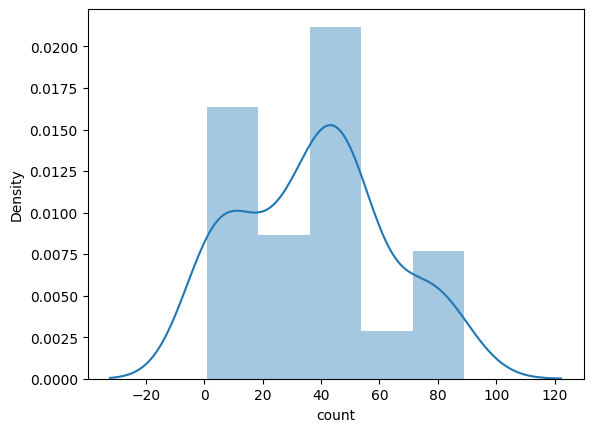

In [21]:
sns.distplot(data['Year_Birth'].value_counts())

In [22]:
data['Year_Birth'].value_counts().skew() #it is neither left skewed or right skewed

0.175115853157649

In [23]:
# Exploring the educartion categories
print(data['Education'].unique())
print(data['Education'].nunique())

# Here we are having the  unique 5 categories data

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
5


In [24]:
#Changing the data into UG and PG categories
data['Education'] = data['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'Post Graduate')
data['Education'] = data['Education'].replace(['Basic'], 'Under Graduate')

In [25]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Post Graduate,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Post Graduate,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Post Graduate,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Post Graduate,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,Post Graduate,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [26]:
data['Marital_Status'].value_counts()

,count
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


In [27]:
# Segregrating the martial_staus only in two categories
data['Marital_Status']=data['Marital_Status'].replace(['Married','Together'],'Relationship')
data['Marital_Status']=data['Marital_Status'].replace(['Divorced','Widow','Alone','YOLO','Absurd'],'Single')

In [28]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Post Graduate,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Post Graduate,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Post Graduate,Relationship,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Post Graduate,Relationship,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,Post Graduate,Relationship,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [29]:
data['Marital_Status'].value_counts()

,count
Marital_Status,
Relationship,1444
Single,796


Analysis On "Kidhome,Teenhome" Variable.

<ipython-input-30-9adc57c10c8e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Kidhome'].value_counts())


<Axes: xlabel='count', ylabel='Density'>

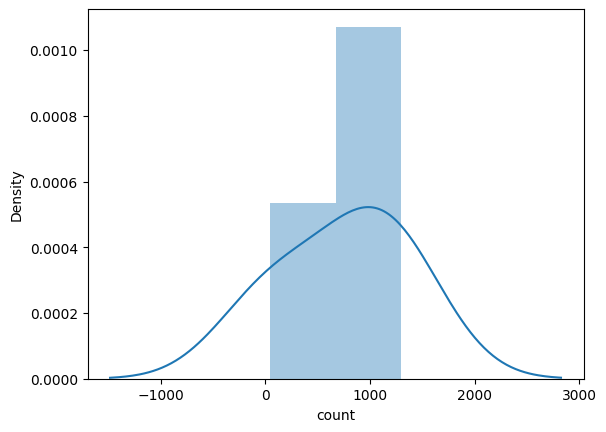

In [30]:
sns.distplot(data['Kidhome'].value_counts())

<ipython-input-31-20a481565f73>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Teenhome'].value_counts())


<Axes: xlabel='count', ylabel='Density'>

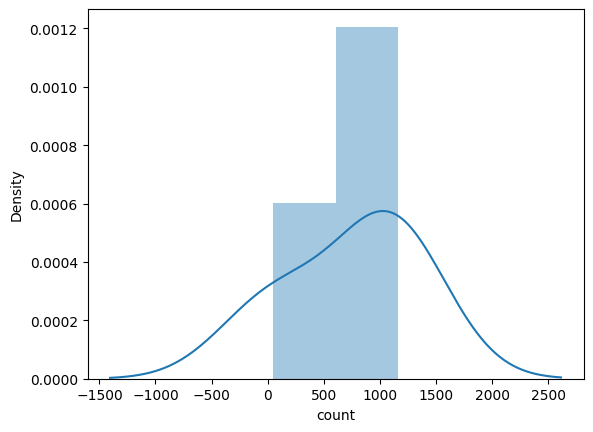

In [31]:
sns.distplot(data['Teenhome'].value_counts())

In [32]:
# Combining different dataframe into a single column to reduce the number of dimension
data['Kids'] = data['Kidhome'] + data['Teenhome']

In [33]:
#droping the column kidhome and teenhome
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Kids
0,5524,1957,Post Graduate,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0
1,2174,1954,Post Graduate,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2
2,4141,1965,Post Graduate,Relationship,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Post Graduate,Relationship,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1
4,5324,1981,Post Graduate,Relationship,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1


In [34]:
data=data.drop(columns=['Kidhome','Teenhome'],axis=1)

In [35]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Kids
0,5524,1957,Post Graduate,Single,58138.0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0
1,2174,1954,Post Graduate,Single,46344.0,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2
2,4141,1965,Post Graduate,Relationship,71613.0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Post Graduate,Relationship,26646.0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1
4,5324,1981,Post Graduate,Relationship,58293.0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1


In [36]:
data.shape

(2240, 28)

#Analysis On "MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds" Variable.

In [37]:
data[['MntFruits','MntMeatProducts']].head()

,MntFruits,MntMeatProducts
0,88,546
1,1,6
2,49,127
3,4,20
4,43,118


In [38]:
data['MntFishProducts'].nunique()

182

In [39]:
data['MntFruits'].nunique()

158

In [40]:
# Combining different dataframe into a single column to reduce the number of dimension
data['Expenses'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data['Expenses'].head()

,Expenses
0,1617
1,27
2,776
3,53
4,422


In [41]:
data['Expenses'].describe()

,Expenses
count,2240.000000
mean,605.798214
std,602.249288
min,5.000000
25%,68.750000
50%,396.000000
75%,1045.500000
max,2525.000000


<ipython-input-42-8493129e21b8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Expenses"])


<Axes: xlabel='Expenses', ylabel='Density'>

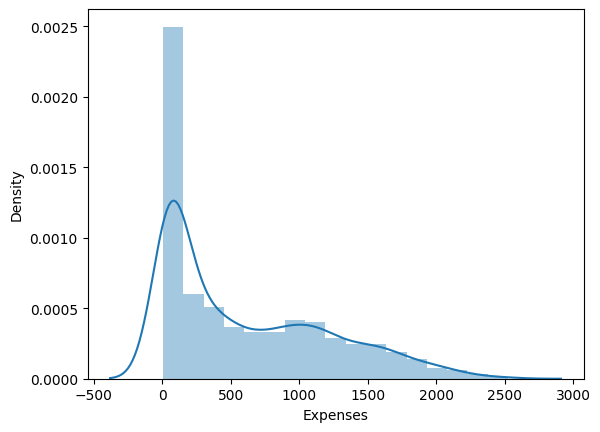

In [42]:
sns.distplot(data["Expenses"])

<Axes: ylabel='Expenses'>

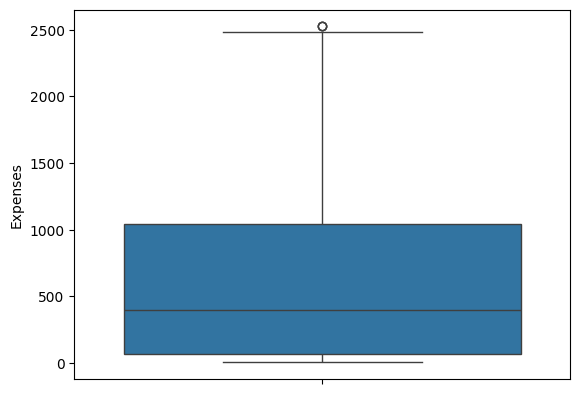

In [43]:
sns.boxplot(data["Expenses"])

In [44]:
data["Expenses"].skew()

0.8608405071736205

In [45]:
data=data.drop(columns=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'],axis=1)

In [46]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Kids,Expenses
0,5524,1957,Post Graduate,Single,58138.0,2012-09-04,58,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0,1617
1,2174,1954,Post Graduate,Single,46344.0,2014-03-08,38,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2,27
2,4141,1965,Post Graduate,Relationship,71613.0,2013-08-21,26,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,776
3,6182,1984,Post Graduate,Relationship,26646.0,2014-02-10,26,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1,53
4,5324,1981,Post Graduate,Relationship,58293.0,2014-01-19,94,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1,422


In [47]:
data.shape

(2240, 23)

In [48]:
data['AcceptedCmp1'].unique()

array([0, 1])

In [49]:
data['AcceptedCmp2'].unique()

array([0, 1])

# here we are adding because the one who will accept the campaign in the very first attempt,will not be going for the 2nd and 3rd

In [50]:
data['TotalAcceptedCmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']

In [51]:
data=data.drop(columns=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'],axis=1)


In [52]:
data['TotalAcceptedCmp'].value_counts()

,count
TotalAcceptedCmp,
0,1777
1,325
2,83
3,44
4,11


<Axes: xlabel='TotalAcceptedCmp', ylabel='Count'>

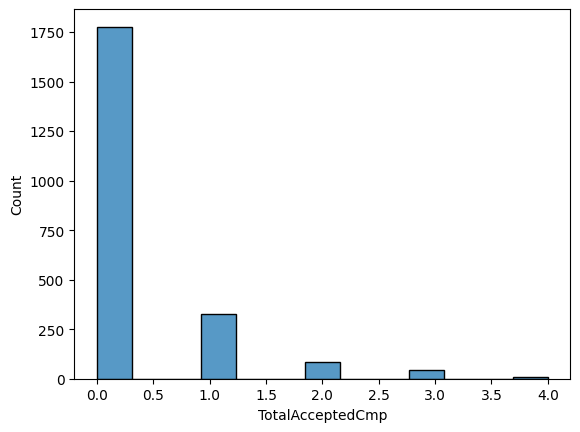

In [53]:
# Plotting this
sns.histplot(data['TotalAcceptedCmp'])

In [54]:
data.shape

(2240, 19)

#Analysis on "NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases" Variable.

In [55]:
data['NumWebPurchases'].unique()

array([ 8,  1,  2,  5,  6,  7,  4,  3, 11,  0, 27, 10,  9, 23, 25])

In [56]:
data['NumCatalogPurchases'].unique()

array([10,  1,  2,  0,  3,  4,  6, 28,  9,  5,  8,  7, 11, 22])

In [57]:
data['NumStorePurchases'].unique()

array([ 4,  2, 10,  6,  7,  0,  3,  8,  5, 12,  9, 13, 11,  1])

In [58]:
data['NumTotalPurchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumDealsPurchases']
data['NumTotalPurchases'].unique()

array([25,  6, 21,  8, 19, 22, 10,  2,  4, 16, 15,  5, 26,  9, 13, 12, 43,
       17, 20, 14, 27, 11, 18, 28,  7, 24, 29, 23, 32, 30, 37, 31, 33, 35,
       39,  1, 34,  0, 44])

In [59]:
data['NumTotalPurchases']

,NumTotalPurchases
0,25
1,6
2,21
3,8
4,19
...,...
2235,18
2236,22
2237,19
2238,23


In [60]:
data['NumTotalPurchases'].describe()

,NumTotalPurchases
count,2240.000000
mean,14.862054
std,7.677173
min,0.000000
25%,8.000000
50%,15.000000
75%,21.000000
max,44.000000


In [61]:
data['NumTotalPurchases'].value_counts()

,count
NumTotalPurchases,
7,149
5,145
4,128
6,123
17,116
9,102
19,101
16,101
21,95


<Axes: xlabel='NumTotalPurchases', ylabel='count'>

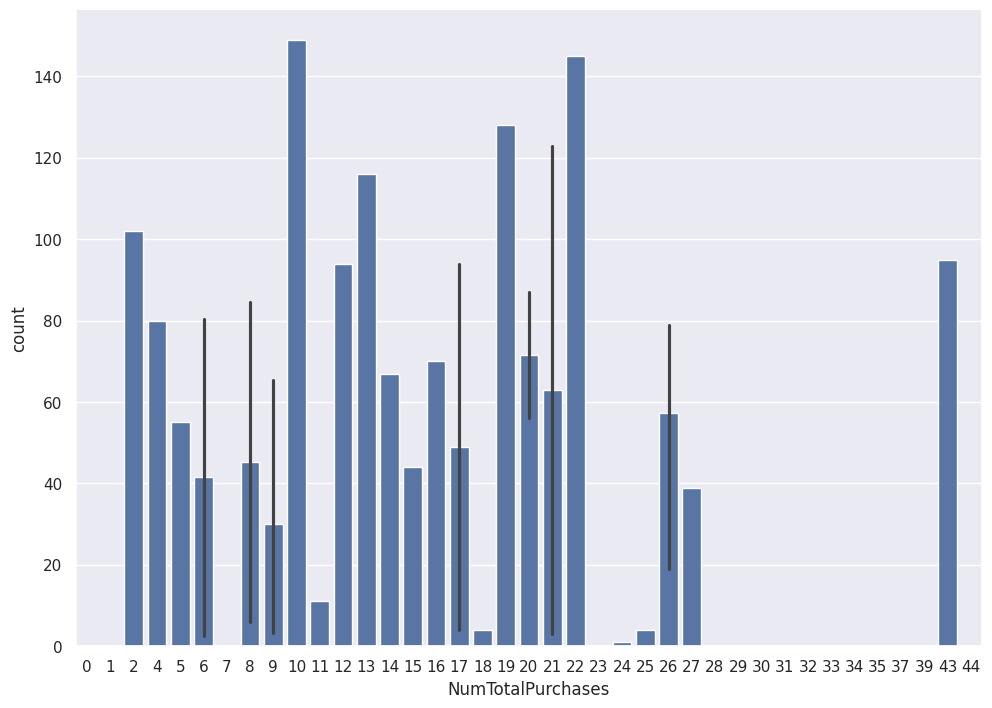

In [62]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(y=data['NumTotalPurchases'].value_counts(),x=data['NumTotalPurchases'])

In [63]:
data=data.drop(columns=['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumDealsPurchases'],axis=1)

In [64]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,5524,1957,Post Graduate,Single,58138.0,2012-09-04,58,7,0,3,11,1,0,1617,0,25
1,2174,1954,Post Graduate,Single,46344.0,2014-03-08,38,5,0,3,11,0,2,27,0,6
2,4141,1965,Post Graduate,Relationship,71613.0,2013-08-21,26,4,0,3,11,0,0,776,0,21
3,6182,1984,Post Graduate,Relationship,26646.0,2014-02-10,26,6,0,3,11,0,1,53,0,8
4,5324,1981,Post Graduate,Relationship,58293.0,2014-01-19,94,5,0,3,11,0,1,422,0,19


In [65]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


Creating a feature ("Customer_For") of the number of days the customers started to shop in the store relative to the last recorded date

In [66]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data['Customer_For'] = data['Customer_For'].apply(lambda x:x.days) # Extracting the day from dates

In [67]:
data.shape

(2240, 17)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 2240 non-null   int64         
 1   Year_Birth         2240 non-null   int64         
 2   Education          2240 non-null   object        
 3   Marital_Status     2240 non-null   object        
 4   Income             2240 non-null   float64       
 5   Dt_Customer        2240 non-null   datetime64[ns]
 6   Recency            2240 non-null   int64         
 7   NumWebVisitsMonth  2240 non-null   int64         
 8   Complain           2240 non-null   int64         
 9   Z_CostContact      2240 non-null   int64         
 10  Z_Revenue          2240 non-null   int64         
 11  Response           2240 non-null   int64         
 12  Kids               2240 non-null   int64         
 13  Expenses           2240 non-null   int64         
 14  TotalAcc

In [69]:
data.drop(['Dt_Customer'],axis=1,inplace=True)

In [70]:
data.shape

(2240, 16)

In [71]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_For
0,5524,1957,Post Graduate,Single,58138.0,58,7,0,3,11,1,0,1617,0,25,663
1,2174,1954,Post Graduate,Single,46344.0,38,5,0,3,11,0,2,27,0,6,113
2,4141,1965,Post Graduate,Relationship,71613.0,26,4,0,3,11,0,0,776,0,21,312
3,6182,1984,Post Graduate,Relationship,26646.0,26,6,0,3,11,0,1,53,0,8,139
4,5324,1981,Post Graduate,Relationship,58293.0,94,5,0,3,11,0,1,422,0,19,161


In [72]:
data = pd.get_dummies(data, columns=['Education', 'Marital_Status'], drop_first=True)

In [73]:
data.head()

,ID,Year_Birth,Income,Recency,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_For,Education_Under Graduate,Marital_Status_Single
0,5524,1957,58138.0,58,7,0,3,11,1,0,1617,0,25,663,False,True
1,2174,1954,46344.0,38,5,0,3,11,0,2,27,0,6,113,False,True
2,4141,1965,71613.0,26,4,0,3,11,0,0,776,0,21,312,False,False
3,6182,1984,26646.0,26,6,0,3,11,0,1,53,0,8,139,False,False
4,5324,1981,58293.0,94,5,0,3,11,0,1,422,0,19,161,False,False


In [74]:
data['Marital_Status_Single']=data['Marital_Status_Single'].replace(False,0)
data['Marital_Status_Single']=data['Marital_Status_Single'].replace(True,1)
data['Marital_Status_Single'].value_counts()

<ipython-input-74-dae52df3c758>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Marital_Status_Single']=data['Marital_Status_Single'].replace(True,1)


,count
Marital_Status_Single,
0,1444
1,796


In [75]:
data['Education_Under Graduate']=data['Education_Under Graduate'].replace(False,0)
data['Education_Under Graduate']=data['Education_Under Graduate'].replace(True,1)
data['Education_Under Graduate'].value_counts()

<ipython-input-75-3b9e6a275769>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Education_Under Graduate']=data['Education_Under Graduate'].replace(True,1)


,count
Education_Under Graduate,
0,2186
1,54


In [76]:
data.head()

,ID,Year_Birth,Income,Recency,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_For,Education_Under Graduate,Marital_Status_Single
0,5524,1957,58138.0,58,7,0,3,11,1,0,1617,0,25,663,0,1
1,2174,1954,46344.0,38,5,0,3,11,0,2,27,0,6,113,0,1
2,4141,1965,71613.0,26,4,0,3,11,0,0,776,0,21,312,0,0
3,6182,1984,26646.0,26,6,0,3,11,0,1,53,0,8,139,0,0
4,5324,1981,58293.0,94,5,0,3,11,0,1,422,0,19,161,0,0


In [77]:
customer_id=data['ID']

In [78]:
#ADDING A COLUMN "customer_Age" IN THE DATAFRAME....
data['Customer_Age'] = (pd.Timestamp('now').year) - data['Year_Birth']
data.head()

,ID,Year_Birth,Income,Recency,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_For,Education_Under Graduate,Marital_Status_Single,Customer_Age
0,5524,1957,58138.0,58,7,0,3,11,1,0,1617,0,25,663,0,1,67
1,2174,1954,46344.0,38,5,0,3,11,0,2,27,0,6,113,0,1,70
2,4141,1965,71613.0,26,4,0,3,11,0,0,776,0,21,312,0,0,59
3,6182,1984,26646.0,26,6,0,3,11,0,1,53,0,8,139,0,0,40
4,5324,1981,58293.0,94,5,0,3,11,0,1,422,0,19,161,0,0,43


<ipython-input-79-16f1cdede1b6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Customer_Age"],color = 'turquoise')


<Axes: xlabel='Customer_Age', ylabel='Density'>

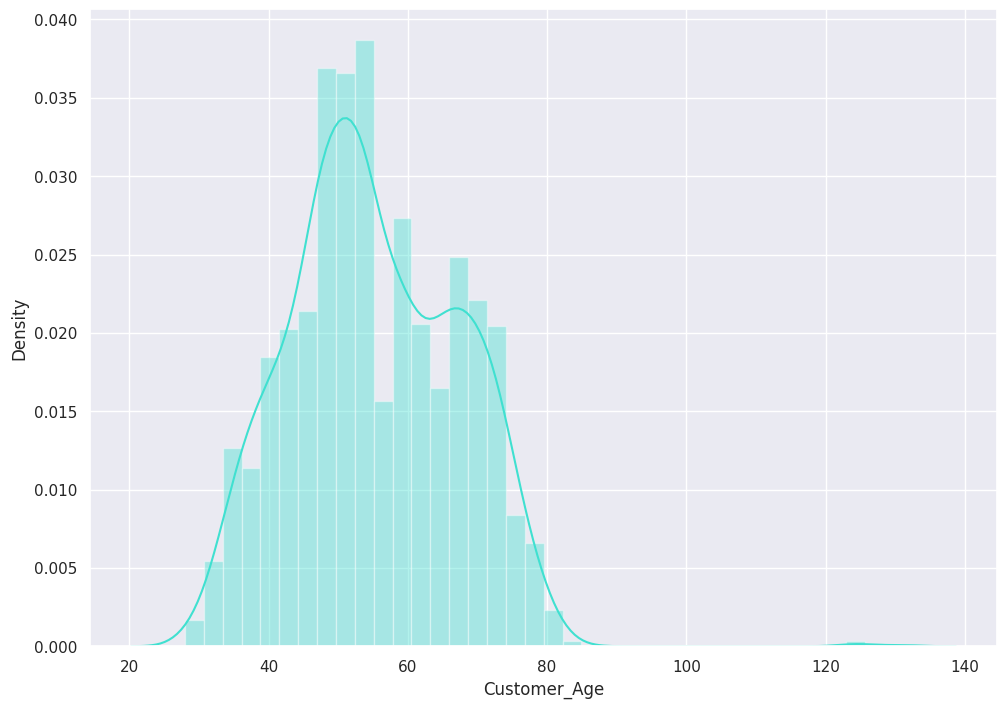

In [79]:
sns.distplot(data["Customer_Age"],color = 'turquoise')

In [80]:
data=data.drop(columns=['Year_Birth','ID'],axis=1)

In [81]:
data.head()

,Income,Recency,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_For,Education_Under Graduate,Marital_Status_Single,Customer_Age
0,58138.0,58,7,0,3,11,1,0,1617,0,25,663,0,1,67
1,46344.0,38,5,0,3,11,0,2,27,0,6,113,0,1,70
2,71613.0,26,4,0,3,11,0,0,776,0,21,312,0,0,59
3,26646.0,26,6,0,3,11,0,1,53,0,8,139,0,0,40
4,58293.0,94,5,0,3,11,0,1,422,0,19,161,0,0,43


# Analyzing the expense with respect to education type and marital status and having kids

<Axes: xlabel='Education_Under Graduate', ylabel='Expenses'>

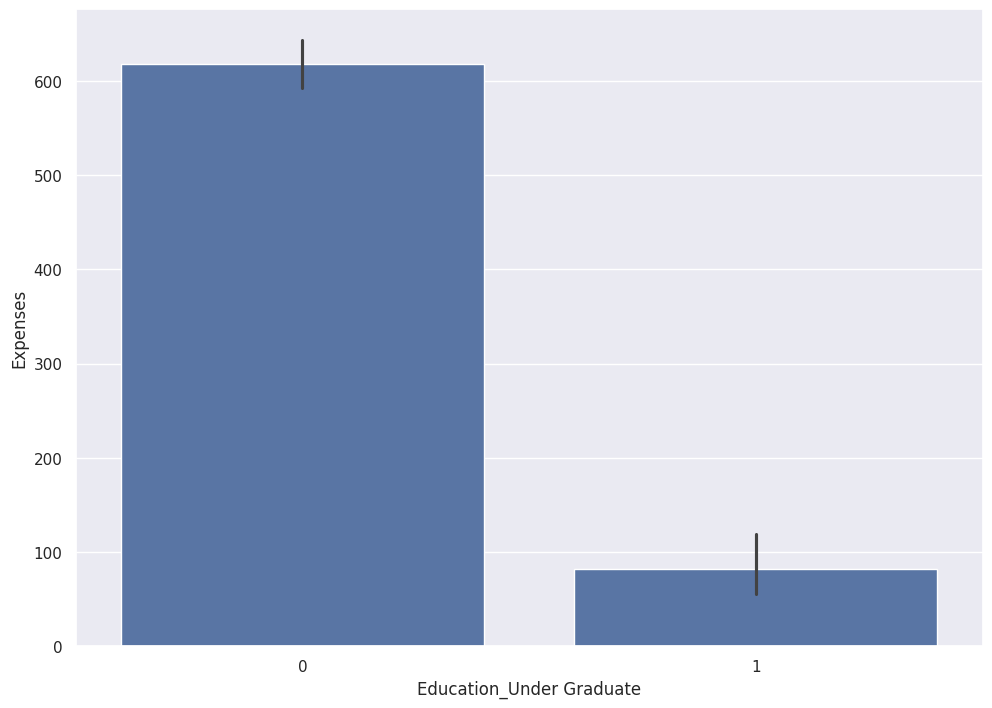

In [82]:
sns.barplot(x=data['Education_Under Graduate'],y=data['Expenses'])

<Axes: xlabel='Marital_Status_Single', ylabel='Expenses'>

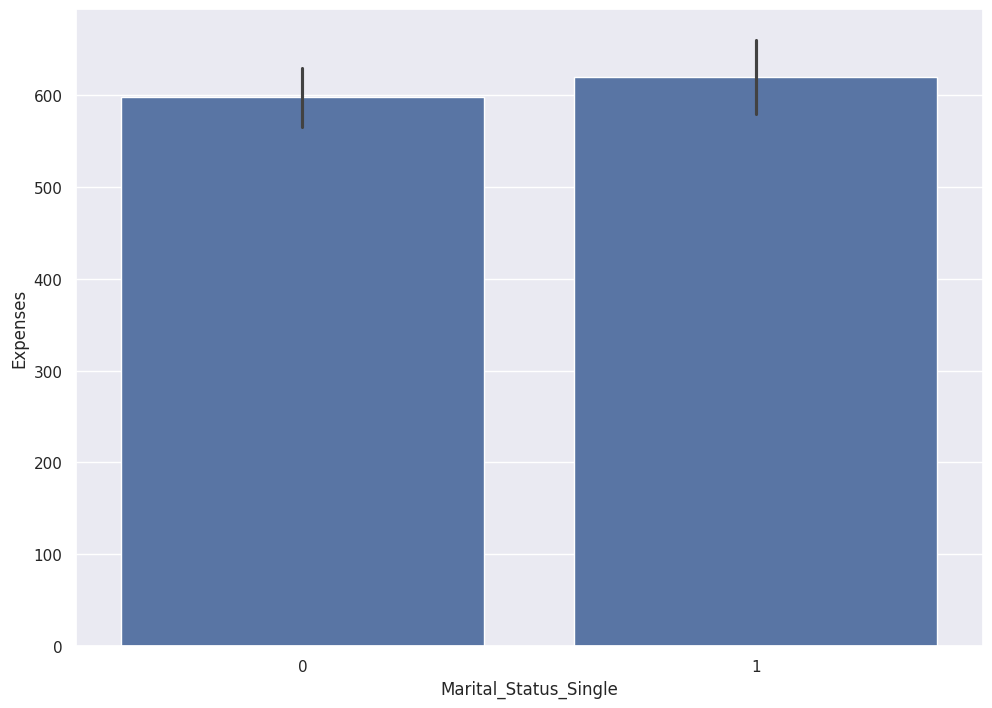

In [83]:
sns.barplot(x=data['Marital_Status_Single'],y=data['Expenses'])

<Axes: xlabel='Kids', ylabel='Expenses'>

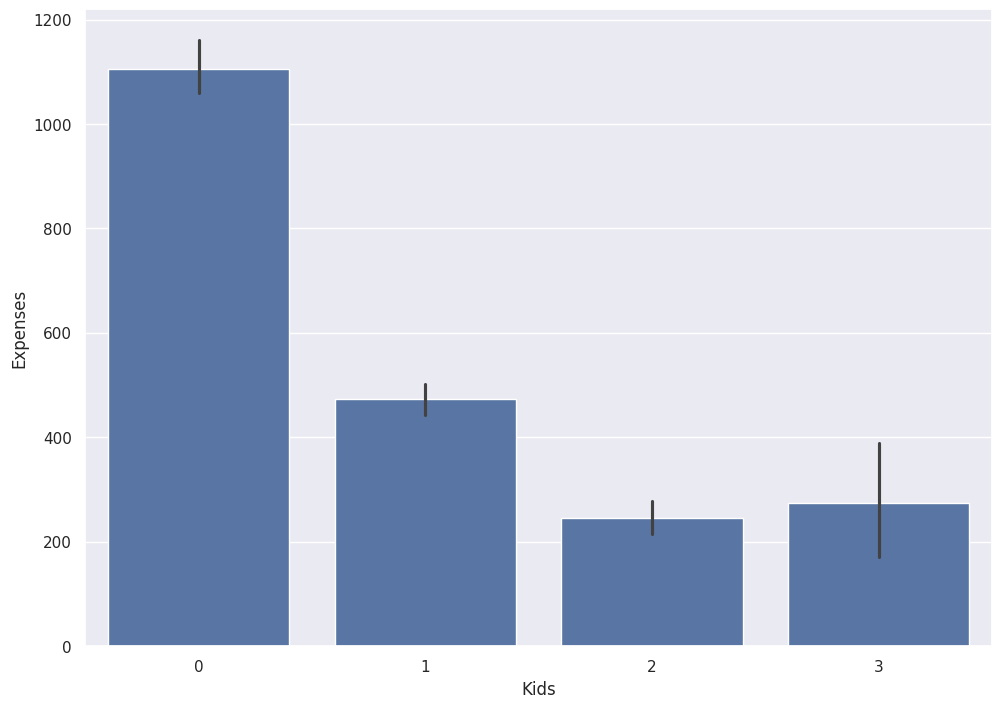

In [84]:
sns.barplot(x=data['Kids'],y=data['Expenses'])

# NumTotalPurchases vs Expenses

<Axes: xlabel='NumTotalPurchases', ylabel='Expenses'>

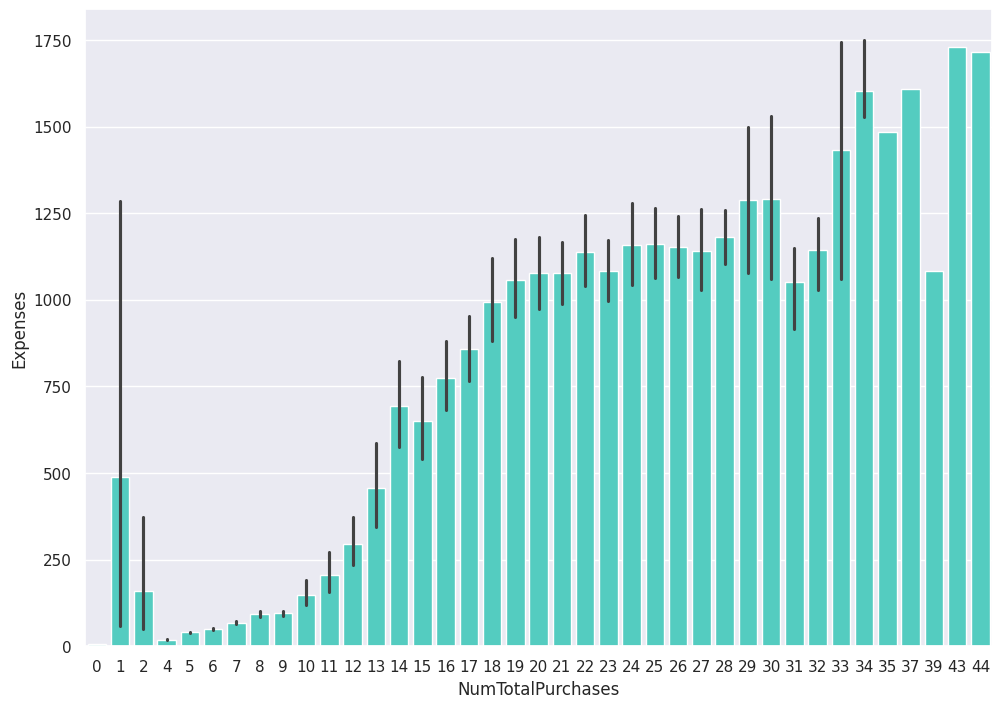

In [85]:
sns.barplot(x=data['NumTotalPurchases'],y=data['Expenses'],color = 'turquoise')

# Checking for the multicolinearity

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["feature"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

# Calculate VIF for the DataFrame (excluding any target variable if you have one)
vif_df = calculate_vif(data)
print(vif_df)

                     feature       VIF
0                     Income  2.162623
1                    Recency  1.060875
2          NumWebVisitsMonth  1.958030
3                   Complain  1.005223
4              Z_CostContact  0.000000
5                  Z_Revenue  0.000000
6                   Response  1.412843
7                       Kids  1.555649
8                   Expenses  4.486339
9           TotalAcceptedCmp  1.555814
10         NumTotalPurchases  2.639556
11              Customer_For  1.331162
12  Education_Under Graduate  1.075362
13     Marital_Status_Single  1.032981
14              Customer_Age  1.078654


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [87]:
# Zero VIF value as we can see,so we should directly drop it
data=data.drop(columns=['Z_CostContact','Z_Revenue'],axis=1)

<Axes: >

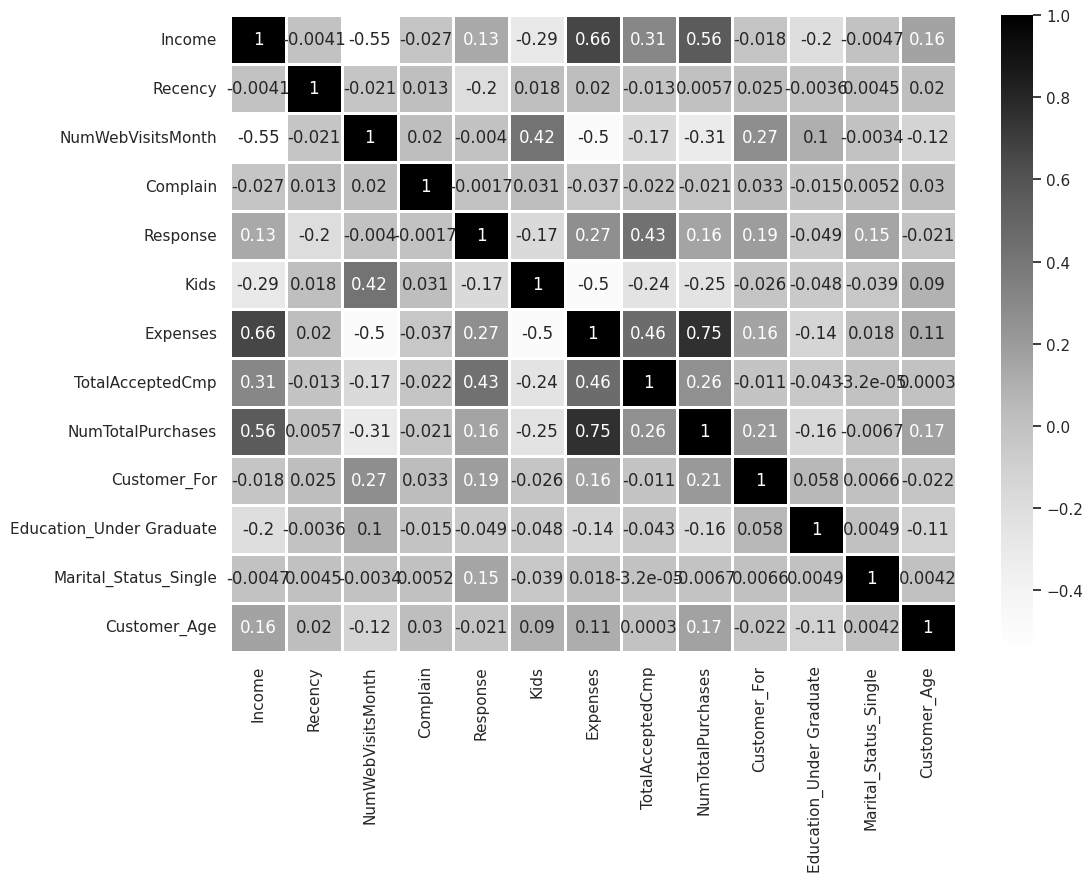

In [88]:
sns.heatmap(data.corr(), annot=True,cmap = 'Greys',linewidths=1)

Income is more positively correlated to Expenses and Number of purchases

Expenses is positively correlated to Income and Number of pur chases and negitively correlated with Kids

# Now we can focus on the model building part

# Model Building Part

In [89]:
# here we are implementing the k-mean clustering which is based on the distance matrix,so will be going for standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=scaler.fit_transform(data)

In [90]:
x

array([[ 0.23569584,  0.30703926,  0.69390374, ..., -0.15717078,
         1.34687429,  0.98534473],
       [-0.23545419, -0.38366418, -0.13046347, ..., -0.15717078,
         1.34687429,  1.23573295],
       [ 0.77399892, -0.79808624, -0.54264708, ..., -0.15717078,
        -0.74245979,  0.3176428 ],
       ...,
       [ 0.18947568,  1.44669994,  0.28172013, ..., -0.15717078,
         1.34687429, -1.01776106],
       [ 0.67940139, -1.41971934, -0.95483068, ..., -0.15717078,
        -0.74245979,  1.06880747],
       [ 0.02520835, -0.31459383,  0.69390374, ..., -0.15717078,
        -0.74245979,  1.23573295]])

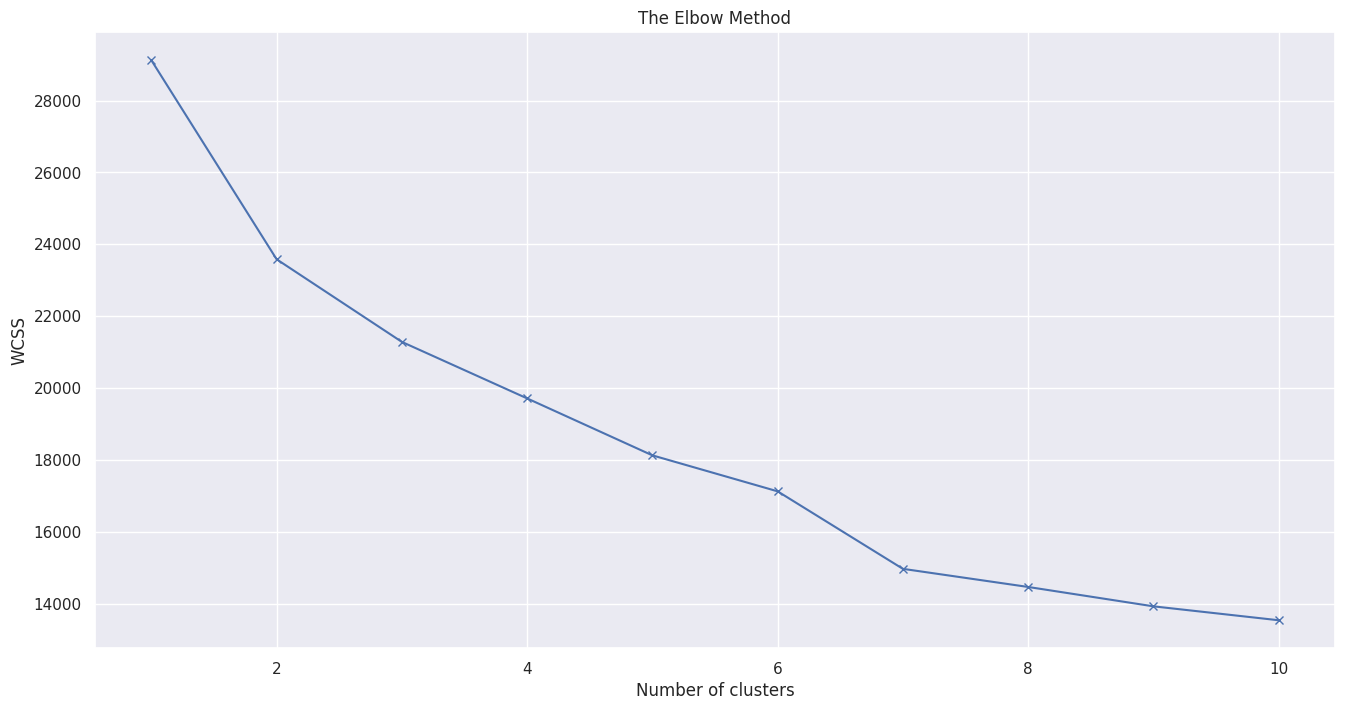

In [91]:
# importing the matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Here ideal cluster number will be 3

In [110]:
# Training a predicting using K-Means Algorithm.
kmeans=KMeans(n_clusters=2, random_state=42).fit(x)
pred=kmeans.predict(x)

In [111]:
data['Cluster']=pred+1
data['customer_id']=customer_id # As we are replacing zero naming cluster to 1

In [112]:
data.head()

,Income,Recency,NumWebVisitsMonth,Complain,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_For,Education_Under Graduate,Marital_Status_Single,Customer_Age,Cluster,customer_id
0,58138.0,58,7,0,1,0,1617,0,25,663,0,1,67,2,5524
1,46344.0,38,5,0,0,2,27,0,6,113,0,1,70,1,2174
2,71613.0,26,4,0,0,0,776,0,21,312,0,0,59,2,4141
3,26646.0,26,6,0,0,1,53,0,8,139,0,0,40,1,6182
4,58293.0,94,5,0,0,1,422,0,19,161,0,0,43,1,5324


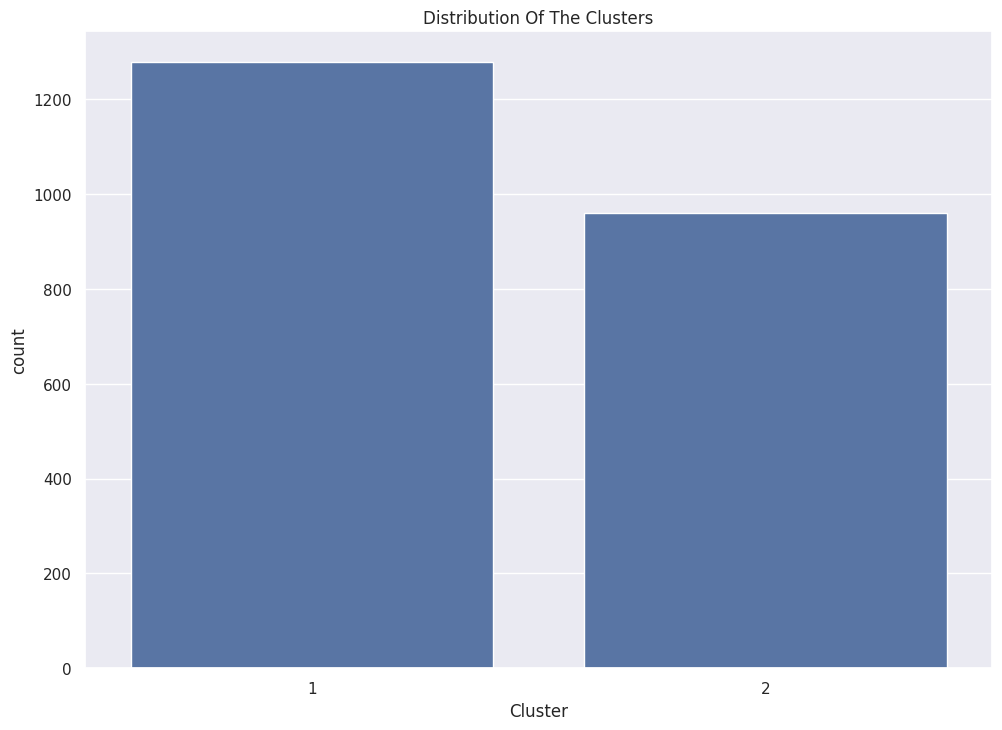

In [113]:
sns.countplot(x=data['Cluster'])
plt.title("Distribution Of The Clusters")
plt.show()

<Axes: xlabel='Expenses', ylabel='Income'>

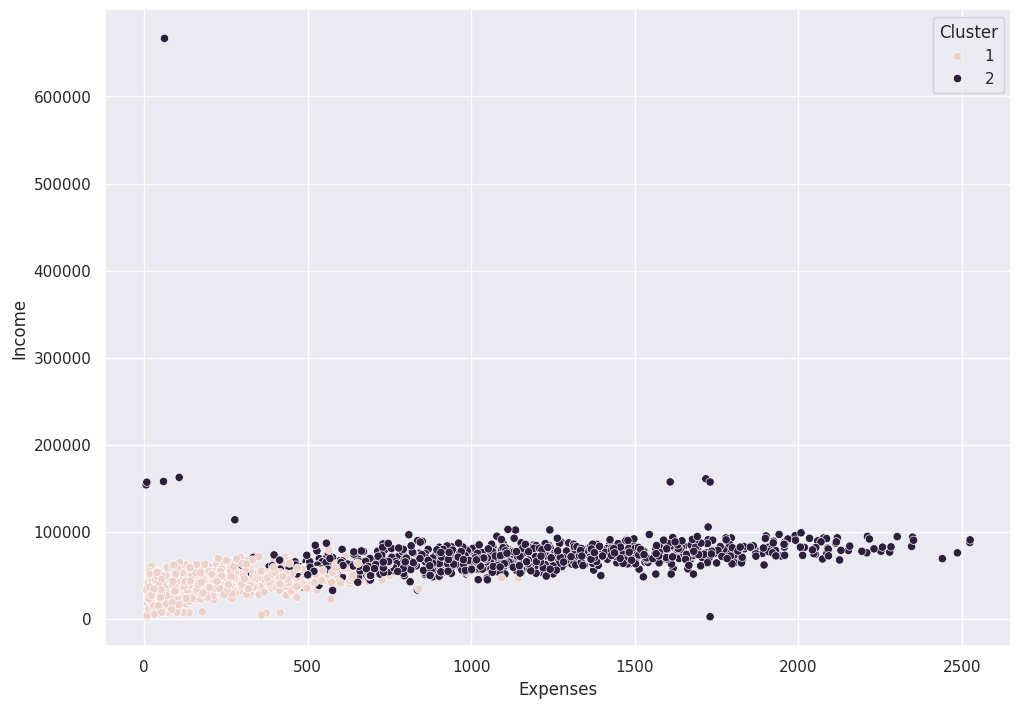

In [114]:
sns.scatterplot(data=data, x='Expenses', y='Income', hue='Cluster')

# here we are interested to know which cluster customer is contributing more business to the company


In [97]:
# here we are interested to know which cluster customer is contributing more business to the company
data.groupby('Cluster')['Expenses'].median()

,Expenses
Cluster,
1,88.5
2,1149.0
3,57.0


In [98]:
# here we are interested to know which cluster customer is contributing more business to the company
data.groupby('Cluster')['NumTotalPurchases'].median()

,NumTotalPurchases
Cluster,
1,9.0
2,21.0
3,6.0


Here Customer fallen in clsuter 2 is contributing more income to the company revenue

In [99]:
#Number of Customer for promoting new product
data['customer_id'][data['Cluster']==2].count()

952

In [100]:
# Customer id for promoting new product
data['customer_id'][data['Cluster']==2].to_csv('filename.csv', index=False)

#Let's Suppose we are not using Elbow Curve and will use Silhoute Score

In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_Scaled=scaler.fit_transform(data)

In [123]:
X_Scaled.mean()

-3.679596310186233e-17

In [102]:
from sklearn.metrics import silhouette_score
sil_score=[]
for i in range(2,10):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(X_Scaled)

  # Get the labels (cluster assignments)
  labels = kmeans.labels_

  # Compute the silhouette score
  score = silhouette_score(X_Scaled,labels)
  sil_score.append(score)

In [103]:
sil_score

[0.2265400286632627,
 0.13103141451982525,
 0.11489279696639945,
 0.14528223495524367,
 0.1351378229757041,
 0.14267854565011173,
 0.14519988583611415,
 0.13179666975164867]

Through this I have found out best optimal number of Cluster is 2

##Implementing the DBSCAN Clustering

Cluster labels: [0 0 0 ... 0 0 0]
Silhouette Score: 0.441


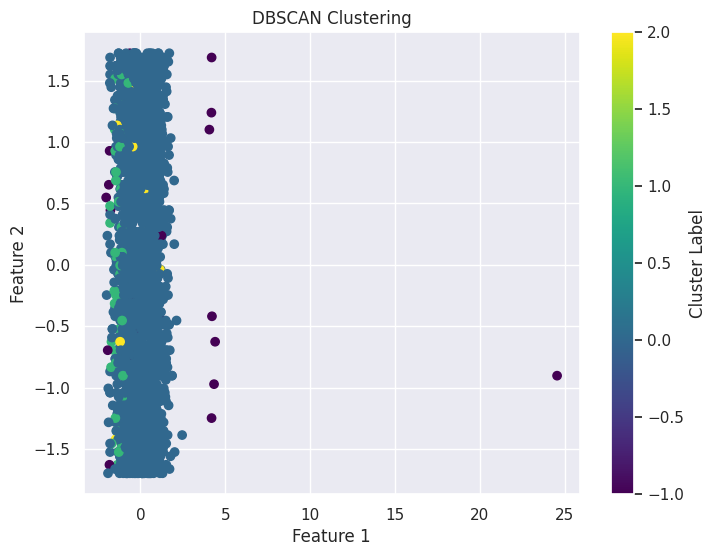

In [104]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=3.45, min_samples=5)
labels = dbscan.fit_predict(X_Scaled)

# Show the labels assigned by DBSCAN
print("Cluster labels:", labels)

# Evaluate using Silhouette Score
silhouette_avg = silhouette_score(X_Scaled, labels)
print(f'Silhouette Score: {silhouette_avg:.3f}')

# Visualize the clusters (for 2D or reduced 2D data)
plt.figure(figsize=(8, 6))
plt.scatter(X_Scaled[:, 0], X_Scaled[:, 1], c=labels, cmap='viridis', marker='o')
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Cluster Label')
plt.show()

In [105]:
labels

array([0, 0, 0, ..., 0, 0, 0])

In [106]:
from collections import Counter

# Count frequency of each element
frequency = Counter(labels)

# Print the frequency count
print(frequency)

Counter({0: 2149, 1: 54, -1: 23, 2: 14})


In [107]:
# Create an empty dictionary to store the frequencies
frequency = {}

# Iterate through each element in the list
for item in labels:
    # If the element is already in the dictionary, increment its count
    if item in frequency:
        frequency[item] += 1
    else:
        # If the element is not in the dictionary, add it with count 1
        frequency[item] = 1

# Print the frequency of each element
print(frequency)

{0: 2149, -1: 23, 1: 54, 2: 14}


In [108]:
# import warnings
# warnings.filterwarnings('ignore')

# from sklearn.model_selection import GridSearchCV

# # Define the hyperparameter grid
# param_distributions = {
#     'eps': np.linspace(2.0, 4.0, 100),        # eps values between 2.0 and 4.0
#     'min_samples': [3,4,5,6,7,8,9,10]          # min_samples values
# }

# # Setup RandomizedSearchCV
# GridSearchCV = GridSearchCV(dbscan, param_distributions,  cv=3, scoring=silhouette_score)

# # Fit the random search to the data
# GridSearchCV.fit(X_Scaled)

# # Get the best parameters and score
# best_params_grid = GridSearchCV.best_params_
# print(f"Best Parameters (Random Search): {best_params_grid}")


Cluster labels: [ 0  1  2 ... -1  2  3]
Silhouette Score: -0.023


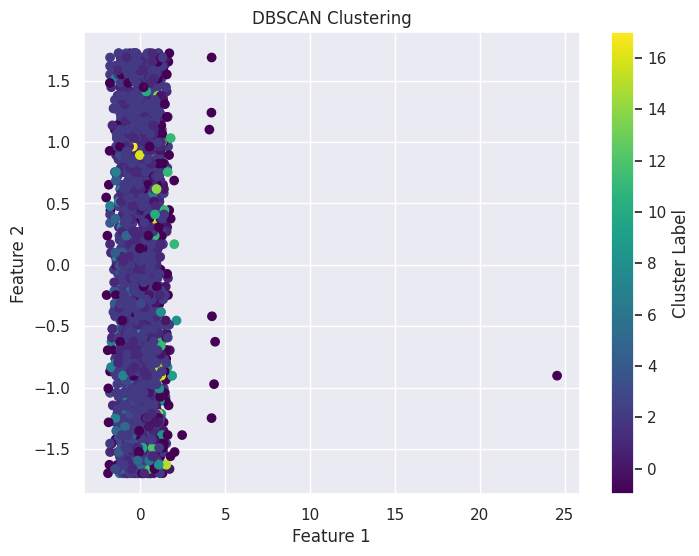

In [109]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=2, min_samples=3)
labels = dbscan.fit_predict(X_Scaled)

# Show the labels assigned by DBSCAN
print("Cluster labels:", labels)

# Evaluate using Silhouette Score
silhouette_avg = silhouette_score(X_Scaled, labels)
print(f'Silhouette Score: {silhouette_avg:.3f}')

# Visualize the clusters (for 2D or reduced 2D data)
plt.figure(figsize=(8, 6))
plt.scatter(X_Scaled[:, 0], X_Scaled[:, 1], c=labels, cmap='viridis', marker='o')
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Cluster Label')
plt.show()